# Bitcoin Price Preditction

##1. Load and export the dataset for data preparation.

In [ ]:
# Import necessary libraries for data preparation
import pandas as pd # For data manipulation and analysis
import numpy as np  # For numerical operations

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the dataset
df = pd.read_csv('BTC-USD.csv') # Read the csv file into a pandas DataFrame called 'df'
df                              # Display the first and last 5 rows of the DataFrame

,Date,Open,High,Low,Close,Adj Close,Volume
0,10-10-2014,364.687012,375.066986,352.963013,361.562012,361.562012,4.366570e+07
1,11-10-2014,361.362000,367.191010,355.950989,362.299011,362.299011,1.334520e+07
2,12-10-2014,362.605988,379.433014,356.144012,378.549011,378.549011,1.755280e+07
3,13-10-2014,377.920990,397.226013,368.897003,390.414001,390.414001,3.522140e+07
4,14-10-2014,391.691986,411.697998,391.324005,400.869995,400.869995,3.849150e+07
...,...,...,...,...,...,...,...
3561,10-07-2024,58033.882810,59359.433590,57178.414060,57742.496090,57742.496090,2.617526e+10
3562,11-07-2024,57729.890630,59299.433590,57120.378910,57344.914060,57344.914060,2.870780e+10
3563,12-07-2024,57341.195310,58532.554690,56590.175780,57899.464840,57899.464840,2.560481e+10
3564,13-07-2024,57908.738280,59787.078130,57796.441410,59231.953130,59231.953130,1.708006e+10


#####1.1. Data Preparation- check for missing values, duplicates, and resampling to different time frequencies.

In [ ]:
# Check for null values
df.isnull().sum() # Check for missing values in each column and sum them up

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# No null values
# Check for duplicates in df (if any)
df.duplicated().sum() # Check for duplicate rows in the DataFrame and sum them up

np.int64(0)

In [ ]:
# Convert 'Date' to datetime objects and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Convert the 'Date' column to datetime objects so we can work with dates easily
df.set_index('Date', inplace=True)                         # Set the 'Date' column as the index of the DataFrame for time-based operations

In [ ]:
# Resampling to different time frequencies
# Resample to weekly frequency (taking the mean for most columns and sum for Volume)
df_weekly = df.resample('W').agg({                         # Resample the data to weekly intervals
    'Open': 'mean',                                        # Calc the avg 'Open' price for each week
    'High': 'mean',                                        # Calc the avg 'High' price for each week
    'Low': 'mean',                                         # Calc the avg 'Low' price for each week
    'Close': 'mean',                                       # Calc the avg 'Close' price for each week
    'Adj Close': 'mean',                                   # Calc the avg 'Adj Close' price for each week
    'Volume': 'sum'                                        # Calculate the total 'Volume' for each week
})

# Resample to monthly frequency
df_monthly = df.resample('ME').agg({                       # Resample the data to monthly intervals, using 'ME' as recommended
    'Open': 'mean',                                        # Calc the avg 'Open' price for each month
    'High': 'mean',                                        # Calc the avg 'High' price for each month
    'Low': 'mean',                                         # Calc the avg 'Low' price for each month
    'Close': 'mean',                                       # Calc the avg 'Close' price for each month
    'Adj Close': 'mean',                                   # Calc the avg 'Adj Close' price for each month
    'Volume': 'sum'                                        # Calc the total 'Volume' for each month
})

print("Weekly Resampled Data:")                            # Print a header for the weekly data
display(df_weekly.head())                                  # Display the first 5 rows of the weekly resampled DataFrame

print("\nMonthly Resampled Data:")                         # Print a header for the monthly data
display(df_monthly.head())                                 # Display the first 5 rows of the monthly resampled DataFrame

Weekly Resampled Data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-12,362.885000,373.897003,355.019338,367.470011,367.470011,74563700.0
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,156902070.0
2014-10-26,372.202999,377.111572,362.556431,367.316428,367.316428,113691800.0
2014-11-02,344.360574,349.283713,335.960850,340.209289,340.209289,107075700.0
2014-11-09,337.174146,346.499145,335.407144,342.569859,342.569859,116793470.0



Monthly Resampled Data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-31,371.043045,378.246001,362.539637,369.854911,369.854911,4.269524e+08
2014-11-30,364.850235,376.494235,357.241832,366.099799,366.099799,6.597334e+08
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,5.531023e+08
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,1.098812e+09
2015-02-28,232.821856,240.211430,227.769678,234.153645,234.153645,7.115187e+08


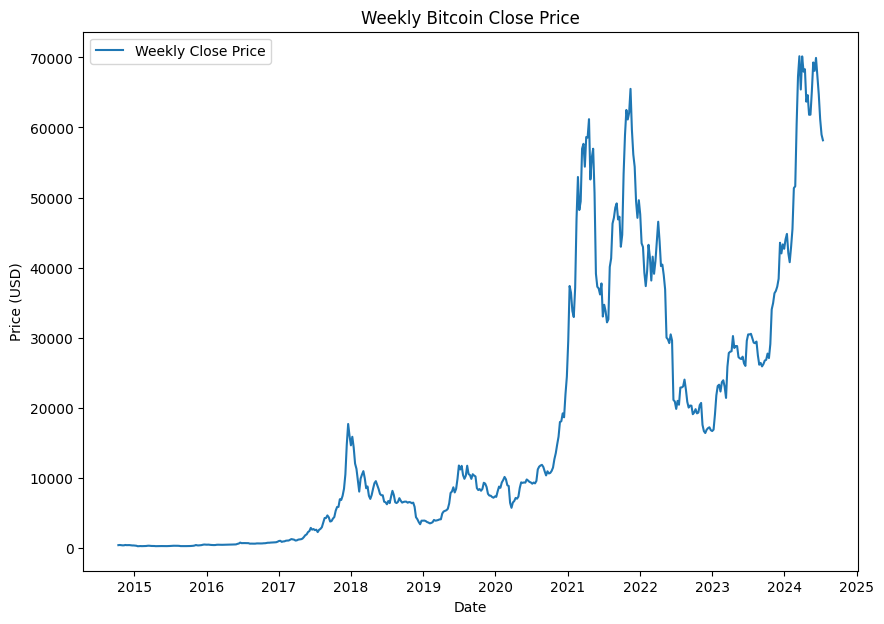

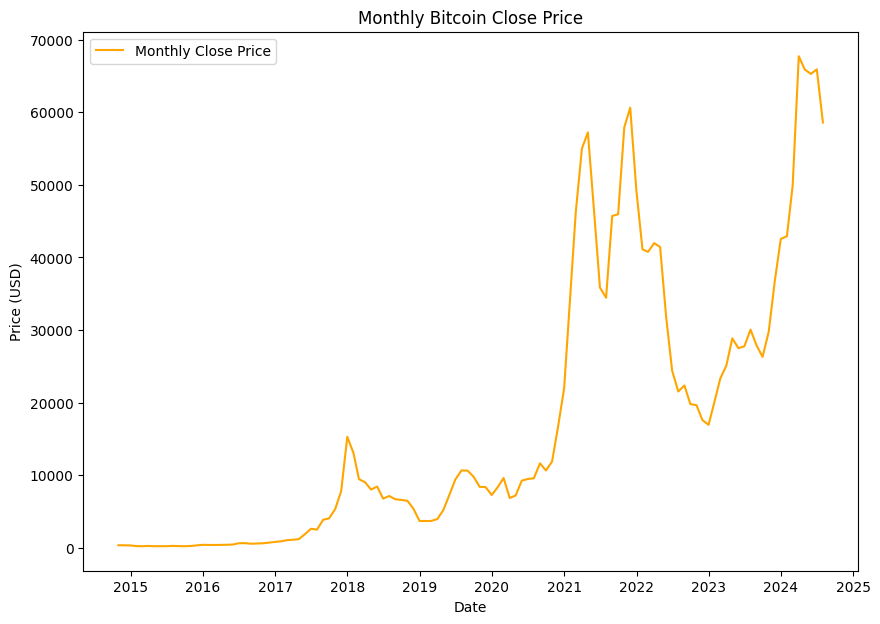

In [ ]:
import matplotlib.pyplot as plt # For plotting
import seaborn as sns           # For enhanced visualizations

# Plotting weekly resampled data
plt.figure(figsize=(10, 7))                              # Create a figure with specified size
plt.plot(df_weekly['Close'], label='Weekly Close Price') # Plot the weekly close price
plt.title('Weekly Bitcoin Close Price')                  # Set the title of the plot
plt.xlabel('Date')                                       # Set the label for the x-axis
plt.ylabel('Price (USD)')                                # Set the label for the y-axis
plt.legend()                                             # Display the legend
plt.show()                                               # Show the plot

# Plotting monthly resampled data
plt.figure(figsize=(10, 7)) # Create another figure for the monthly data
plt.plot(df_monthly['Close'], label='Monthly Close Price', color='orange') # Plot the monthly close price with a different color
plt.title('Monthly Bitcoin Close Price')                                   # Set the title of the plot
plt.xlabel('Date')                                                         # Set the label for the x-axis
plt.ylabel('Price (USD)')                                                  # Set the label for the y-axis
plt.legend()                                                               # Display the legend
plt.show()                                                                 # Show the plot

###2. Exploratory Data Analysis
2.1. Plot trading volumes, price trends, and other relevant patterns like seasonality.

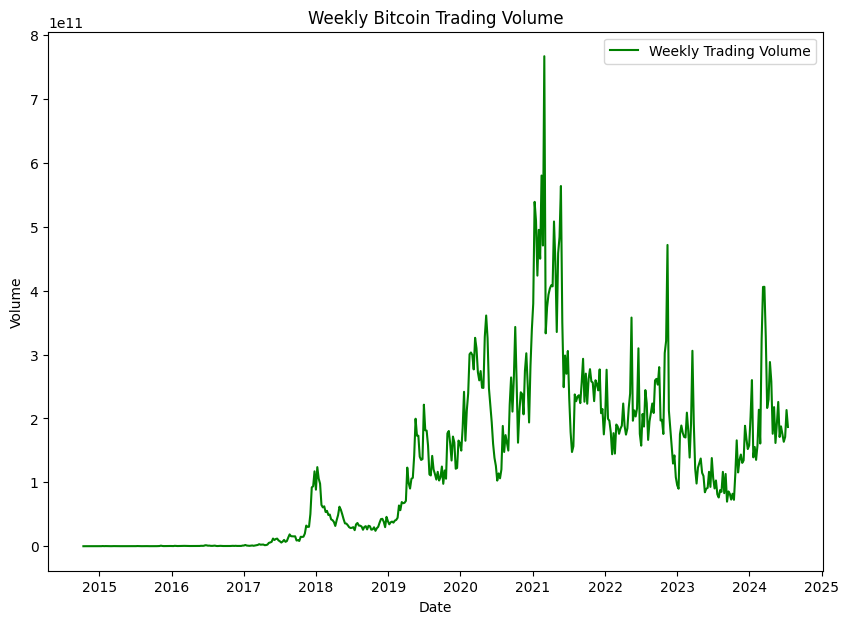

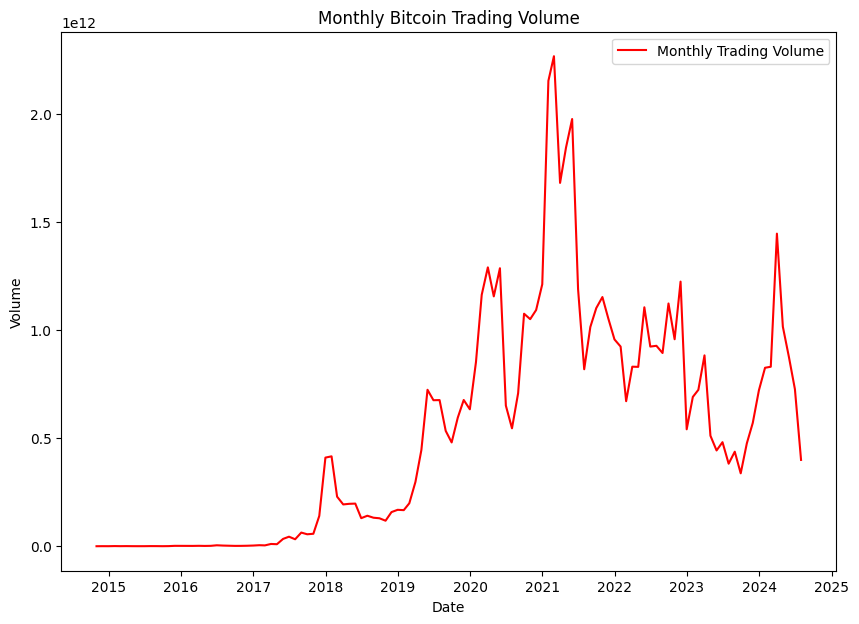

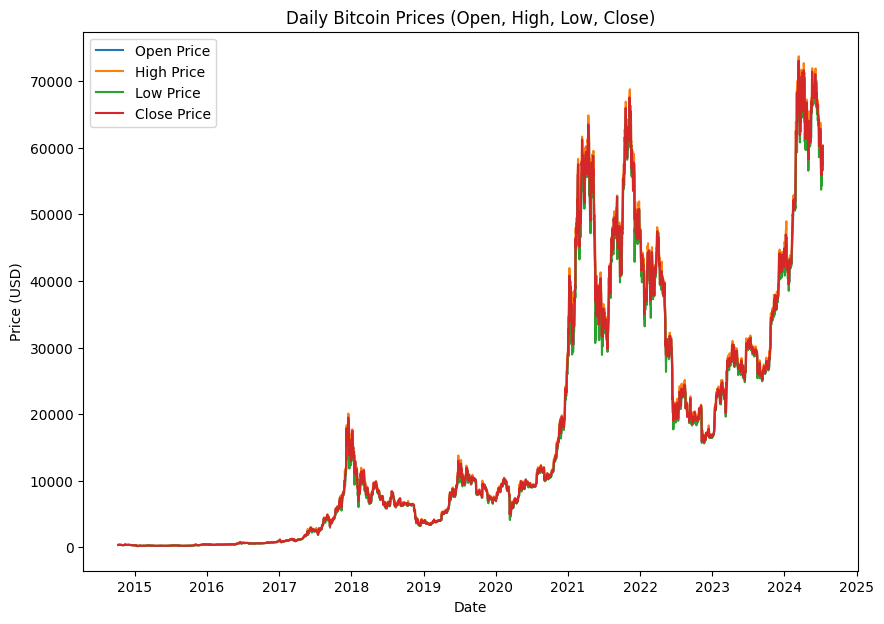

In [ ]:
# Plotting weekly resampled data - Volume
plt.figure(figsize=(10, 7))                                                 # Create a fig with a specified size
plt.plot(df_weekly['Volume'], label='Weekly Trading Volume', color='green') # Plot the weekly trading volume
plt.title('Weekly Bitcoin Trading Volume')                                  # Set the title of the plot
plt.xlabel('Date')                                                          # Set the label for the x-axis
plt.ylabel('Volume')                                                        # Set the label for the y-axis
plt.legend()                                                                # Display the legend
plt.show()                                                                  # Show the plot

# Plotting monthly resampled data - Volume
plt.figure(figsize=(10, 7))                                                 # Create another fig for the monthly data
plt.plot(df_monthly['Volume'], label='Monthly Trading Volume', color='red') # Plot the monthly trading volume with a diff color
plt.title('Monthly Bitcoin Trading Volume')                                 # Set the title of the plot
plt.xlabel('Date')                                                          # Set the label for the x-axis
plt.ylabel('Volume')                                                        # Set the label for the y-axis
plt.legend()                                                                # Display the legend
plt.show()                                                                  # Show the plot

# Plotting daily data - Open, High, Low, Close
plt.figure(figsize=(10, 7))                                                 # Create a figure for daily data
plt.plot(df['Open'], label='Open Price')                                    # Plot the daily open price
plt.plot(df['High'], label='High Price')                                    # Plot the daily high price
plt.plot(df['Low'], label='Low Price')                                      # Plot the daily low price
plt.plot(df['Close'], label='Close Price')                                  # Plot the daily close price
plt.title('Daily Bitcoin Prices (Open, High, Low, Close)')                  # Set the title
plt.xlabel('Date')                                                          # Set x-axis label
plt.ylabel('Price (USD)')                                                   # Set y-axis label
plt.legend()                                                                # Display legend
plt.show()                                                                  # Show plot

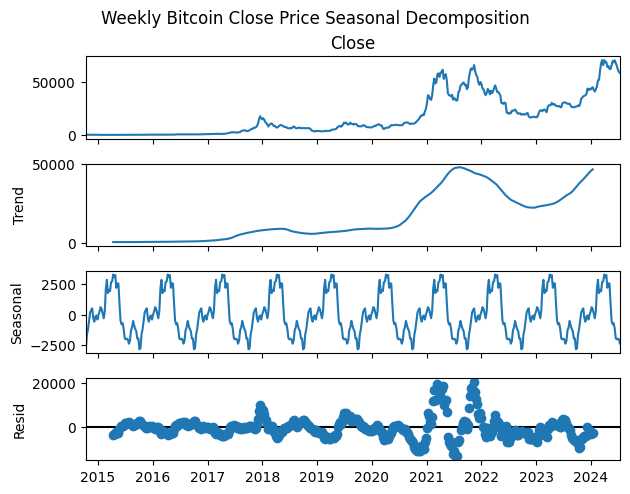

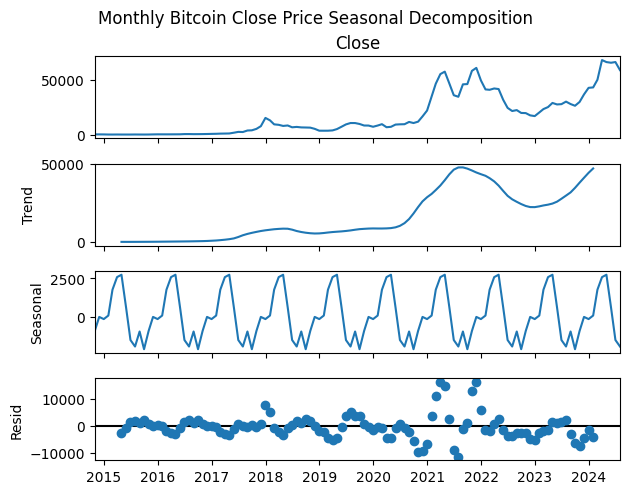

In [ ]:
# Check for seasonality in BTC price data
# Import seasonal_decompose for time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on the weekly data
result_weekly = seasonal_decompose(df_weekly['Close'], model='additive')  # Perform additive decomposition on weekly close price
result_weekly.plot()                                                      # Plot the decomposition results
plt.suptitle('Weekly Bitcoin Close Price Seasonal Decomposition', y=1.02) # Set the main title
plt.show() # Show the plot

# Perform seasonal decomposition on the monthly data
result_monthly = seasonal_decompose(df_monthly['Close'], model='additive') # Perform additive decomposition on monthly close price
result_monthly.plot()                                                      # Plot the decomposition results
plt.suptitle('Monthly Bitcoin Close Price Seasonal Decomposition', y=1.02) # Set the main title
plt.show() # Show the plot

2.2. Check for Outliers.

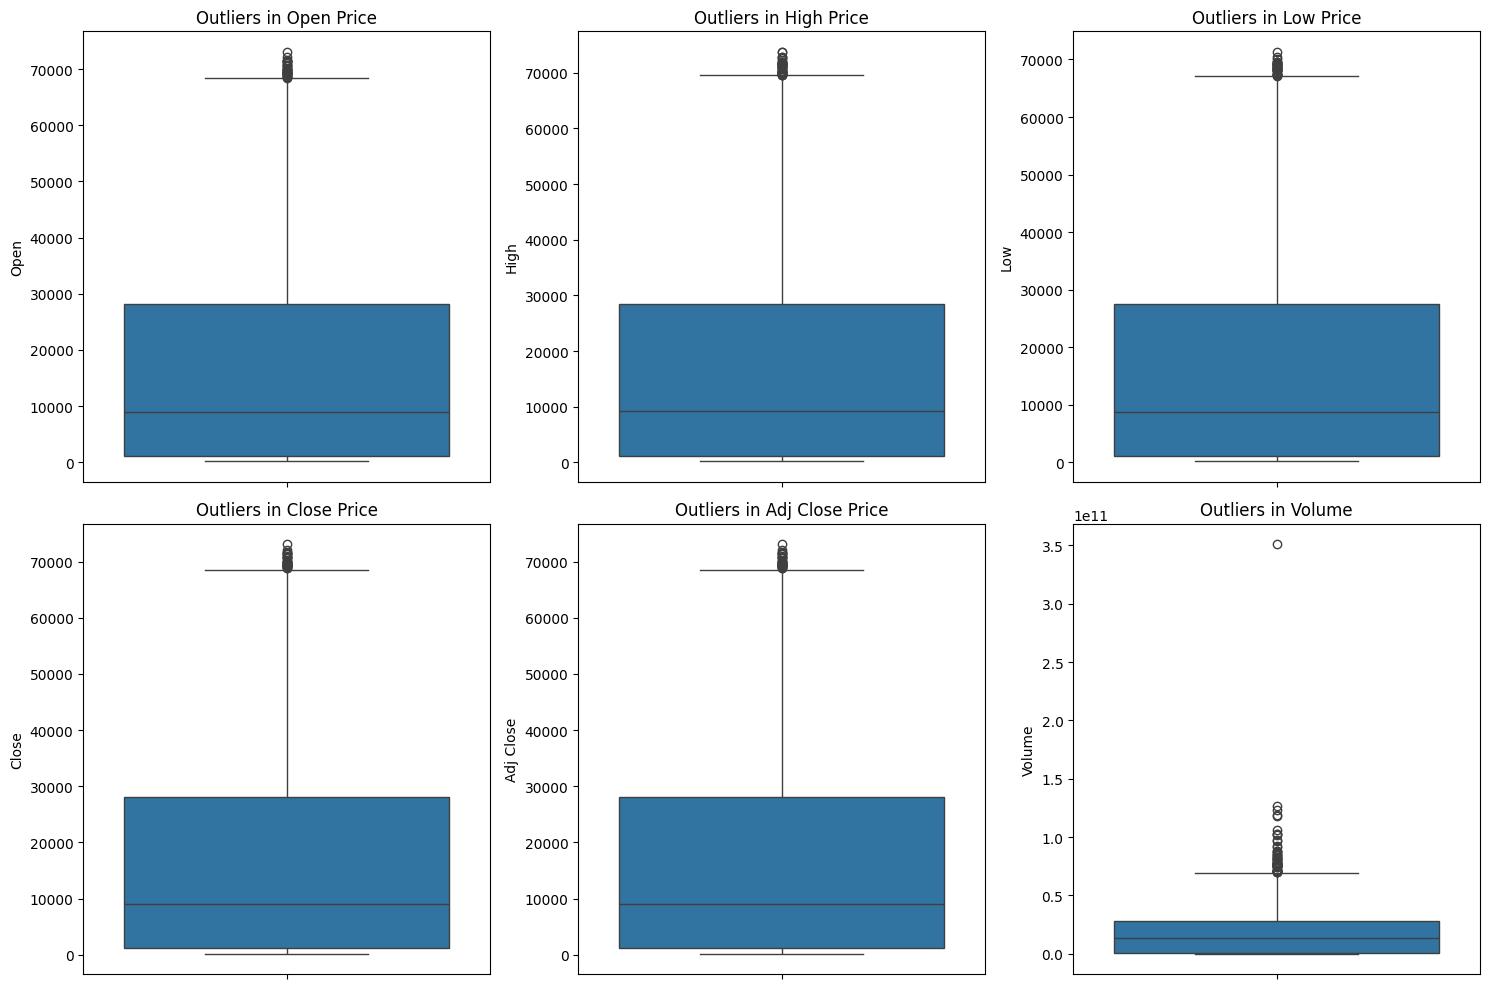

In [ ]:
# Visualize outliers using box plots
plt.figure(figsize=(15, 10)) # Create a figure with a specified size

# Create box plots for each relevant column to visualize outliers
plt.subplot(2, 3, 1)                # Create a subplot for the first box plot
sns.boxplot(y=df['Open'])           # Create a box plot for the 'Open' column
plt.title('Outliers in Open Price') # Set the title for the subplot

plt.subplot(2, 3, 2)                # Create a subplot for the second box plot
sns.boxplot(y=df['High'])           # Create a box plot for the 'High' column
plt.title('Outliers in High Price') # Set the title for the subplot

plt.subplot(2, 3, 3)               # Create a subplot for the third box plot
sns.boxplot(y=df['Low'])           # Create a box plot for the 'Low' column
plt.title('Outliers in Low Price') # Set the title for the subplot

plt.subplot(2, 3, 4)                 # Create a subplot for the fourth box plot
sns.boxplot(y=df['Close'])           # Create a box plot for the 'Close' column
plt.title('Outliers in Close Price') # Set the title for the subplot

plt.subplot(2, 3, 5)                     # Create a subplot for the fifth box plot
sns.boxplot(y=df['Adj Close'])           # Create a box plot for the 'Adj Close' column
plt.title('Outliers in Adj Close Price') # Set the title for the subplot

plt.subplot(2, 3, 6)            # Create a subplot for the sixth box plot
sns.boxplot(y=df['Volume'])     # Create a box plot for the 'Volume' column
plt.title('Outliers in Volume') # Set the title for the subplot

plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
plt.show()         # Show the plots

In [ ]:
# Handle outliers using the IQR method
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']: # Loop through the columns where we want to handle outliers
    Q1 = df[column].quantile(0.25) # Calculate the first quartile (25th percentile)
    Q3 = df[column].quantile(0.75) # Calculate the third quartile (75th percentile)
    IQR = Q3 - Q1                  # Calculate the Interquartile Range (IQR)

    lower_bound = Q1 - 1.5 * IQR # Calculate the lower bound for outlier detection
    upper_bound = Q3 + 1.5 * IQR # Calculate the upper bound for outlier detection

    # Replace values outside the bounds with the bound values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound) # Replace values below the lower bound with the lower bound and values above the upper bound with the upper bound

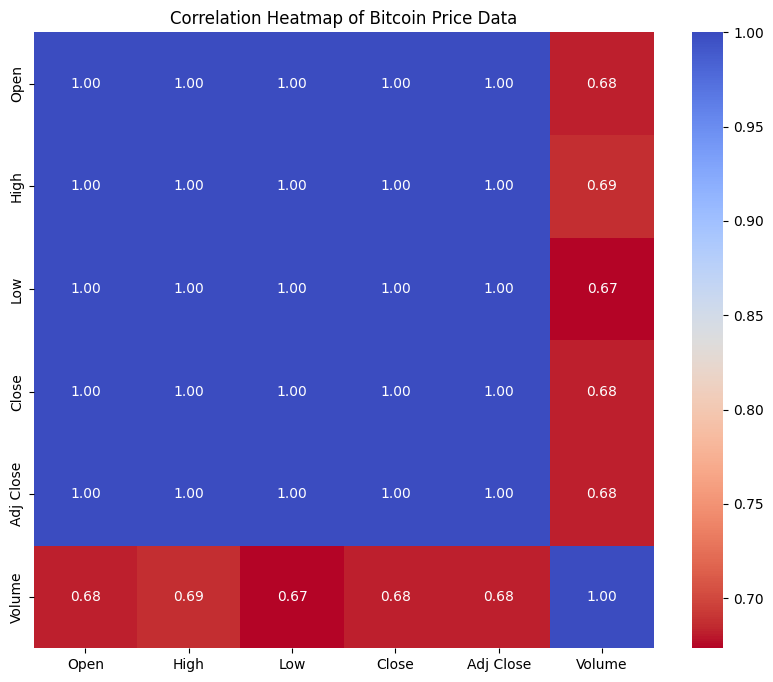

In [ ]:
# Calculate the correlation matrix
# Calculate the pairwise correlation of all columns in the DataFrame
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))                                               # Create a figure with a specified size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f") # Create a heatmap of the correlation matrix, with annotations and a colormap
plt.title('Correlation Heatmap of Bitcoin Price Data')                    # Set the title of the heatmap
plt.show() # Show the heatmap

###3. Feature Engineering
3.1. Calculate additional features like 'moving averages', 'price percentage changes', and 'rolling statistics'.

In [ ]:
# Calculate Moving Averages
df['MA_7'] = df['Close'].rolling(window=7).mean()  # Calculate 7-day moving average
df['MA_30'] = df['Close'].rolling(window=30).mean() # Calculate 30-day moving average

# Calculate Price Percentage Changes
df['Price_Change'] = df['Close'].pct_change() # Calculate daily percentage price change

# Calculate Rolling Statistics (eg, Rolling Standard Deviation)
df['Rolling_Std_7'] = df['Close'].rolling(window=7).std() # Calculate 7-day rolling standard deviation

# Display the first few rows to show the new features
df

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,Price_Change,Rolling_Std_7
Date,,,,,,,,,,
2014-10-10,364.687012,375.066986,352.963013,361.562012,361.562012,4.366570e+07,NaN,NaN,NaN,NaN
2014-10-11,361.362000,367.191010,355.950989,362.299011,362.299011,1.334520e+07,NaN,NaN,0.002038,NaN
2014-10-12,362.605988,379.433014,356.144012,378.549011,378.549011,1.755280e+07,NaN,NaN,0.044852,NaN
2014-10-13,377.920990,397.226013,368.897003,390.414001,390.414001,3.522140e+07,NaN,NaN,0.031343,NaN
2014-10-14,391.691986,411.697998,391.324005,400.869995,400.869995,3.849150e+07,NaN,NaN,0.026782,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-07-10,58033.882810,59359.433590,57178.414060,57742.496090,57742.496090,2.617526e+10,57178.506697,62260.291147,-0.004598,872.926561
2024-07-11,57729.890630,59299.433590,57120.378910,57344.914060,57344.914060,2.870780e+10,57230.965401,61927.387241,-0.006885,869.876487
2024-07-12,57341.195310,58532.554690,56590.175780,57899.464840,57899.464840,2.560481e+10,57407.692521,61582.663152,0.009670,860.724476


In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
MA_7,6
MA_30,29
Price_Change,1
Rolling_Std_7,6


In [ ]:
df.dropna(inplace=True) # Drop rows with missing values (for time series models that rely on past data, eg. moving avg, these initial rows are often unusable as the reqd historical data isnt available. It ensures that the remaining data is complete and suitable for training these models)
df

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,Price_Change,Rolling_Std_7
Date,,,,,,,,,,
2014-11-08,342.153992,347.032013,342.153992,345.488007,345.488007,8.535470e+06,337.231001,360.772468,0.008974,9.248319
2014-11-09,345.376007,363.626007,344.255005,363.264008,363.264008,2.420560e+07,342.569859,360.829201,0.051452,11.991727
2014-11-10,362.265015,374.816010,357.561005,366.924011,366.924011,3.045010e+07,348.194149,360.983368,0.010075,12.968095
2014-11-11,365.856995,371.309998,363.734985,367.695007,367.695007,1.583890e+07,353.508863,360.621568,0.002101,12.098368
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,4.578320e+07,365.519579,361.726468,0.151936,27.625724
...,...,...,...,...,...,...,...,...,...,...
2024-07-10,58033.882810,59359.433590,57178.414060,57742.496090,57742.496090,2.617526e+10,57178.506697,62260.291147,-0.004598,872.926561
2024-07-11,57729.890630,59299.433590,57120.378910,57344.914060,57344.914060,2.870780e+10,57230.965401,61927.387241,-0.006885,869.876487
2024-07-12,57341.195310,58532.554690,56590.175780,57899.464840,57899.464840,2.560481e+10,57407.692521,61582.663152,0.009670,860.724476


###4. Data Splitting (Train, Test, Split)

In [ ]:
# Feature Scaling is generally not reqd for ARIMA, SARIMA, Gradient Boosting, and other tree-based ensemble models
# Split data into training and testing sets (chronological split- dividing time series into training and testing sets, where the training data comes from an earlier time period and the testing data comes from a later time period, preserving the temporal order of the data, and give a more realistic assessment of the models performance on unseen future data)
train_size = int(len(df) * 0.8) # Calculate the size of the training set (80% of the data)
train_data, test_data = df[0:train_size], df[train_size:] # Split the df into training and testing sets

print("Training data shape:", train_data.shape) # Print the shape of the training data
print("Testing data shape:", test_data.shape)   # Print the shape of the testing data

Training data shape: (2829, 10)
Testing data shape: (708, 10)


In [ ]:
# Define target and feature variables
target = 'Close'                                        # Set the target variable as 'Close'
features = [col for col in df.columns if col != target] # Create a list of features by including all columns except the target variable

X_train, y_train = train_data[features], train_data[target] # Create feature matrix X_train and target vector y_train for the training data
X_test, y_test = test_data[features], test_data[target]     # Create feature matrix X_test and target vector y_test for the testing data

print("X_train shape:", X_train.shape) # Print the shape of the training features
print("y_train shape:", y_train.shape) # Print the shape of the training target
print("X_test shape:", X_test.shape)   # Print the shape of the testing features
print("y_test shape:", y_test.shape)   # Print the shape of the testing target

X_train shape: (2829, 9)
y_train shape: (2829,)
X_test shape: (708, 9)
y_test shape: (708,)


###5. Model Selection and Evaluation
5.1. Evaluate various time series models including ARIMA, SARIMA, ensemble methods like Gradient Boosting, Random Forest, and regression model like Decision Tree. (Models have been evaluated on RMSE score- Root Mean Squared Error; checks the models accuracy by measuring magnitude of errors between predicted and actual values in a dataset.)

In [ ]:
# Import ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Instantiate and train the ARIMA model
# Using the 'Close' column from the training data as the time series
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Make predictions on the test data
# The start and end indices for prediction are the indices of the test_data
predictions = arima_result.predict(start=test_data.index[0], end=test_data.index[-1])

# Import metrics for evaluation
from sklearn.metrics import mean_squared_error
from numpy import sqrt

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)

# Print the evaluation metrics
print(f"ARIMA Model MSE: {mse}")
print(f"ARIMA Model RMSE: {rmse}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA Model MSE: 430365597.836914
ARIMA Model RMSE: 20745.254826993907


In [ ]:
# Import SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate and train the SARIMA model
# Using the 'Close' column from the training data as the time series and a seasonal order
sarima_order = (0, 1, 1)
seasonal_order = (0, 1, 1, 7) # Assuming a weekly seasonality
sarima_model = SARIMAX(train_data['Close'], order=sarima_order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Make predictions on the test data
# The start and end indices for prediction are the indices of the test_data
predictions_sarima = sarima_result.predict(start=test_data.index[0], end=test_data.index[-1])

# Calculate MSE and RMSE for SARIMA
mse_sarima = mean_squared_error(y_test, predictions_sarima)
rmse_sarima = sqrt(mse_sarima)

# Print the evaluation metrics for SARIMA
print(f"SARIMA Model MSE: {mse_sarima}")
print(f"SARIMA Model RMSE: {rmse_sarima}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA Model MSE: 321951644.94165105
SARIMA Model RMSE: 17943.011033314644


In [ ]:
# Import Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate and train the Gradient Boosting Regressor model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions on the test data
predictions_gbm = gbm_model.predict(X_test)

# Calculate MSE and RMSE for Gradient Boosting Regressor
mse_gbm = mean_squared_error(y_test, predictions_gbm)
rmse_gbm = sqrt(mse_gbm)

# Print the evaluation metrics for Gradient Boosting Regressor
print(f"Gradient Boosting Regressor Model MSE: {mse_gbm}")
print(f"Gradient Boosting Regressor Model RMSE: {rmse_gbm}")

Gradient Boosting Regressor Model MSE: 177117.6280891071
Gradient Boosting Regressor Model RMSE: 420.85345203420525


In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
predictions_rf = rf_model.predict(X_test)

# Calculate MSE and RMSE for Random Forest Regressor
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = sqrt(mse_rf)

# Print the evaluation metrics for Random Forest Regressor
print(f"Random Forest Regressor Model MSE: {mse_rf}")
print(f"Random Forest Regressor Model RMSE: {rmse_rf}")

Random Forest Regressor Model MSE: 374313.3875753141
Random Forest Regressor Model RMSE: 611.8115621458245


In [ ]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test data
predictions_dt = dt_model.predict(X_test)

# Calculate MSE and RMSE for Decision Tree Regressor
mse_dt = mean_squared_error(y_test, predictions_dt)
rmse_dt = sqrt(mse_dt)

# Print the evaluation metrics for Decision Tree Regressor
print(f"Decision Tree Regressor Model MSE: {mse_dt}")
print(f"Decision Tree Regressor Model RMSE: {rmse_dt}")

Decision Tree Regressor Model MSE: 227211.31561143923
Decision Tree Regressor Model RMSE: 476.66688117745207


In [ ]:
# Compare the RMSE values
rmse_values = {
    'ARIMA': rmse,
    'SARIMA': rmse_sarima,
    'Gradient Boosting Regressor': rmse_gbm,
    'Random Forest Regressor': rmse_rf,
    'Decision Tree Regressor': rmse_dt
}

# Find the model with the lowest RMSE
best_model = min(rmse_values, key=rmse_values.get)
lowest_rmse = rmse_values[best_model]

print("Model Comparison based on RMSE:")
for model, rmse_val in rmse_values.items():
    print(f"{model}: {rmse_val:.2f}")

print(f"\nBest performing model based on RMSE: \n{best_model} with RMSE of {lowest_rmse:.2f}")

Model Comparison based on RMSE:
ARIMA: 20745.25
SARIMA: 17943.01
Gradient Boosting Regressor: 420.85
Random Forest Regressor: 611.81
Decision Tree Regressor: 476.67

Best performing model based on RMSE: 
Gradient Boosting Regressor with RMSE of 420.85


###6. Hyperparameter Tuning
6.1. Hyperparameter tune the selected Gradient Boosting Regressor Model to further improve the models accuracy in predicting the actual values.

###6. Hyperparameter Tuning
6.1. Hyperparameter tune the selected Gradient Boosting Regressor Model to further improve the models accuracy in predicting the actual values.

In [ ]:
# Import necessary libraries for Bayesian Optimization
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Define the parameter space for Bayesian Optimization
param_space = {
    'n_estimators': Integer(50, 500),   # Number of boosting stages (integer values)
    'learning_rate': Real(0.005, 0.3, 'log-uniform'), # Step size shrinkage (log-uniform distribution)
    'max_depth': Integer(3, 8),          # Maximum depth of the individual estimators (integer values)
}

# Instantiate BayesSearchCV with the Gradient Boosting Regressor model and the parameter space
bayes_search = BayesSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                             search_spaces=param_space,
                             n_iter=50, # Number of iterations (samples from the search space)
                             scoring='neg_mean_squared_error', # Use negative MSE for optimization
                             cv=3,      # 3-fold cross-validation
                             random_state=42, # For reproducibility
                             n_jobs=-1) # Use all available CPU cores

# Fit BayesSearchCV to the training data
bayes_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_bo = bayes_search.best_params_
best_mse_bo = -bayes_search.best_score_
best_rmse_bo = sqrt(best_mse_bo)

print("Best Hyperparameters (Bayesian Optimization):", best_params_bo)
print(f"Best Cross-Validation MSE (Bayesian Optimization): {best_mse_bo}")
print(f"Best Cross-Validation RMSE (Bayesian Optimization): {best_rmse_bo}")

# Evaluate the best model on the test data
best_gbm_model_bo = bayes_search.best_estimator_
predictions_tuned_gbm_bo = best_gbm_model_bo.predict(X_test)

mse_tuned_gbm_bo = mean_squared_error(y_test, predictions_tuned_gbm_bo)
rmse_tuned_gbm_bo = sqrt(mse_tuned_gbm_bo)

print(f"\nTuned Gradient Boosting Regressor Model MSE on Test Data (Bayesian Optimization): {mse_tuned_gbm_bo}")
print(f"Tuned Gradient Boosting Regressor Model RMSE on Test Data (Bayesian Optimization): {rmse_tuned_gbm_bo}")

Best Hyperparameters (Bayesian Optimization): OrderedDict({'learning_rate': 0.03452986666030451, 'max_depth': 3, 'n_estimators': 454})
Best Cross-Validation MSE (Bayesian Optimization): 137100026.7889003
Best Cross-Validation RMSE (Bayesian Optimization): 11708.972063716792

Tuned Gradient Boosting Regressor Model MSE on Test Data (Bayesian Optimization): 122325.83063933556
Tuned Gradient Boosting Regressor Model RMSE on Test Data (Bayesian Optimization): 349.75109812456


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.2 MB/s eta 0:00:00


After installing the library, you can run the previous cell to perform Bayesian optimization.

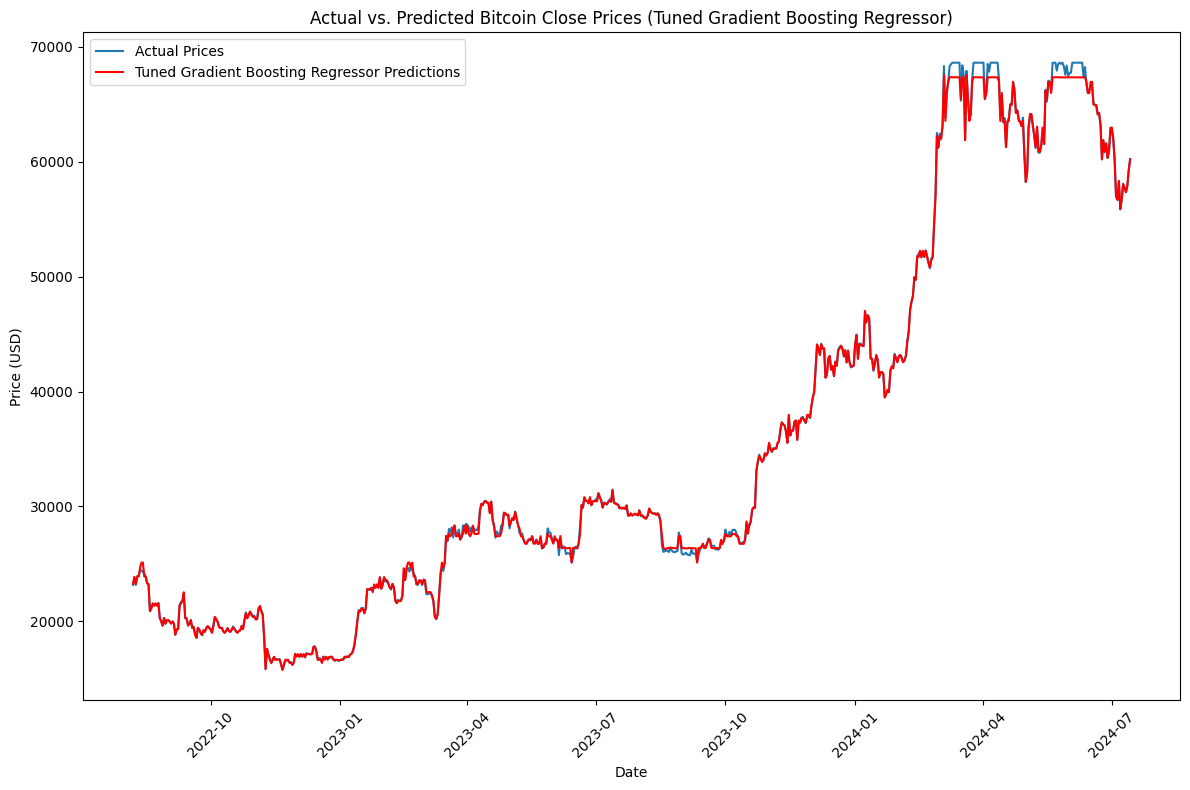

In [ ]:
# Plot the actual vs predicted prices for visualisation
plt.figure(figsize=(12, 8))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(X_test.index, predictions_tuned_gbm_bo, label='Tuned Gradient Boosting Regressor Predictions', color='red')
plt.title('Actual vs. Predicted Bitcoin Close Prices (Tuned Gradient Boosting Regressor)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create a new DataFrame for Tableau dashboard
tableau_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual_Close': y_test,
    'Predicted_Close': predictions_tuned_gbm_bo
})

# Reset the index to make 'Date' a column
tableau_df.reset_index(drop=True, inplace=True)

# Save the DataFrame to a CSV file
tableau_df.to_csv('BTC-USD Predictions.csv', index=False)

# Display the first few rows of the new DataFrame
display(tableau_df.head())

,Date,Actual_Close,Predicted_Close
0,2022-08-07,23175.89063,23246.898092
1,2022-08-08,23809.48633,23880.449583
2,2022-08-09,23164.31836,23245.559710
3,2022-08-10,23947.64258,23869.960924
4,2022-08-11,23957.52930,23899.588050
